# <center>Bike Sharing Demand</center>

### <div align='right'>Filip Kowalski</right>

In [324]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [116]:
# set figure size
plt.rcParams['figure.figsize'] = (10,10)

# Load Data

In [222]:
filename='train.csv'
dataset=read_csv(filename)

# Looking on data 

In [223]:
time=pd.to_datetime(dataset.datetime)
dataset.datetime=time

In [224]:
dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.0,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.63,80,0.0,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.88,86,0.0,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.39,75,0.0,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.43,76,0.0,8,6,14


### Data Fields
<br>
**datetime** - hourly date + timestamp  
**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
<br>
**holiday** - whether the day is considered a holidayr
<br>
**workingday** - whether the day is neither a weekend nor holiday
<br>
**weather**
1. : Clear, Few clouds, Partly cloudy, Partly cloudy 
* : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
* : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
* : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 



**temp** - temperature in Celsius
<br>
**atemp** - "feels like" temperature in Celsius
<br>
**humidity** - relative humidity
<br>
**windspeed** - wind speed
<br>
**casual** - number of non-registered user rentals initiated
<br>
**registered** - number of registered user rentals initiated
<br>
**count** - number of total rentals

In [121]:
print(dataset.shape)

(10886, 12)


# Descriptions of data

In [122]:
print(dataset.describe())

       datetime    season   holiday  workingday   weather      temp     atemp  \
count  10886.00  10886.00  10886.00    10886.00  10886.00  10886.00  10886.00   
mean      11.54      2.51      0.03        0.68      1.42     20.23     23.66   
std        6.92      1.12      0.17        0.47      0.63      7.79      8.47   
min        0.00      1.00      0.00        0.00      1.00      0.82      0.76   
25%        6.00      2.00      0.00        0.00      1.00     13.94     16.66   
50%       12.00      3.00      0.00        1.00      1.00     20.50     24.24   
75%       18.00      4.00      0.00        1.00      2.00     26.24     31.06   
max       23.00      4.00      1.00        1.00      4.00     41.00     45.45   

       humidity  windspeed    casual  registered     count  
count  10886.00   10886.00  10886.00    10886.00  10886.00  
mean      61.89      12.80     36.02      155.55    191.57  
std       19.25       8.16     49.96      151.04    181.14  
min        0.00       0.00

There is no null values. Data look corect (there is not strange values like negative values or to low or to hight numbers)

In [123]:
bins = pd.cut(dataset['count'], [0, 100, 200,300,400,500,600,700,800,900])
groups=dataset.groupby(bins)['count'].agg(['count', 'sum'])
print(groups)

            count     sum
count                    
(0, 100]     4328  155193
(100, 200]   2356  349165
(200, 300]   1720  423964
(300, 400]   1039  361148
(400, 500]    646  289638
(500, 600]    385  211001
(600, 700]    216  140012
(700, 800]    110   81915
(800, 900]     78   65891


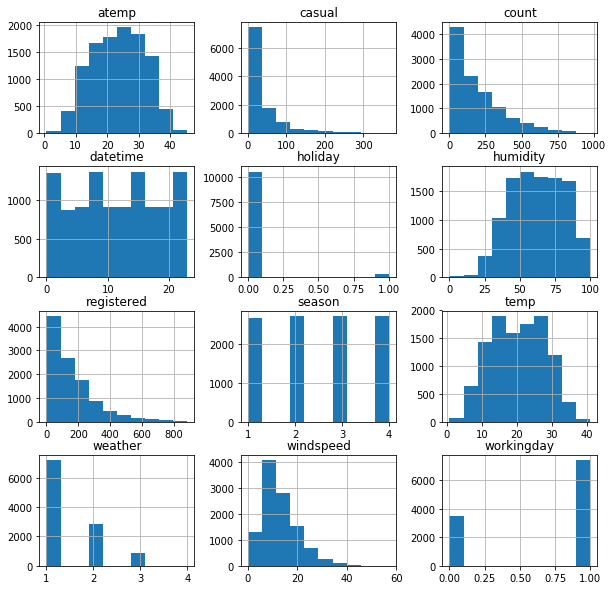

In [124]:
dataset.hist()
plt.show()

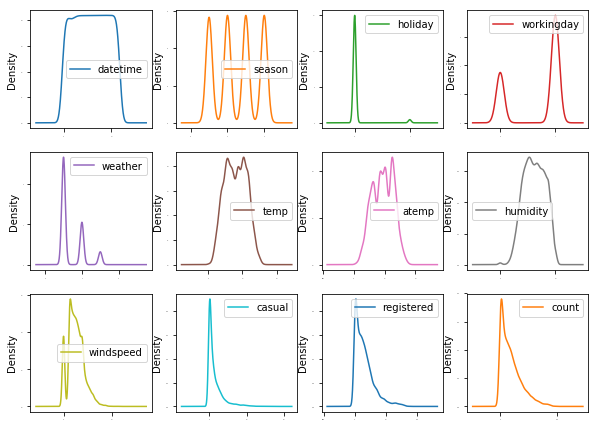

In [125]:
dataset.plot(kind='density',subplots=True,layout=(4,4),sharex=False,sharey=False,legend=True,fontsize=1)
plt.show()

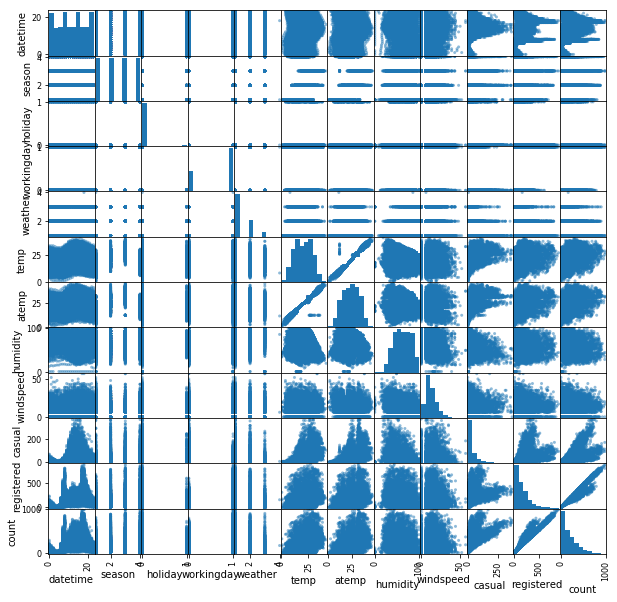

In [126]:
pd.plotting.scatter_matrix(dataset)
plt.show()

In [127]:
pd.set_option('precision',2)
print(dataset.corr(method='pearson'))

            datetime    season   holiday  workingday   weather      temp  \
datetime    1.00e+00 -6.55e-03 -3.54e-04    2.78e-03 -2.27e-02  1.45e-01   
season     -6.55e-03  1.00e+00  2.94e-02   -8.13e-03  8.88e-03  2.59e-01   
holiday    -3.54e-04  2.94e-02  1.00e+00   -2.50e-01 -7.07e-03  2.95e-04   
workingday  2.78e-03 -8.13e-03 -2.50e-01    1.00e+00  3.38e-02  3.00e-02   
weather    -2.27e-02  8.88e-03 -7.07e-03    3.38e-02  1.00e+00 -5.50e-02   
temp        1.45e-01  2.59e-01  2.95e-04    3.00e-02 -5.50e-02  1.00e+00   
atemp       1.40e-01  2.65e-01 -5.21e-03    2.47e-02 -5.54e-02  9.85e-01   
humidity   -2.78e-01  1.91e-01  1.93e-03   -1.09e-02  4.06e-01 -6.49e-02   
windspeed   1.47e-01 -1.47e-01  8.41e-03    1.34e-02  7.26e-03 -1.79e-02   
casual      3.02e-01  9.68e-02  4.38e-02   -3.19e-01 -1.36e-01  4.67e-01   
registered  3.81e-01  1.64e-01 -2.10e-02    1.19e-01 -1.09e-01  3.19e-01   
count       4.01e-01  1.63e-01 -5.39e-03    1.16e-02 -1.29e-01  3.94e-01   

           

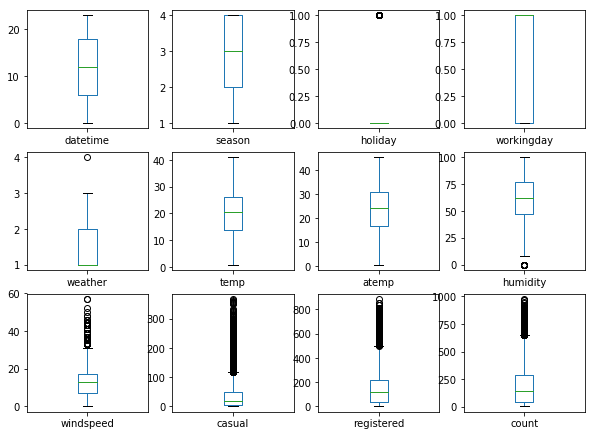

In [128]:
dataset.plot(kind='box',subplots=True,layout=(4,4),sharex=False,sharey=False)
plt.show()

# Prepare data

In [227]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,0,1,0,0,1,9.84,14.39,81,0.0,16
1,1,1,0,0,1,9.02,13.63,80,0.0,40
2,2,1,0,0,1,9.02,13.63,80,0.0,32
3,3,1,0,0,1,9.84,14.39,75,0.0,13
4,4,1,0,0,1,9.84,14.39,75,0.0,1


In [226]:
dataset['datetime'] = dataset['datetime'].dt.hour
dataset=dataset.drop(columns=['registered','casual'])

KeyError: 'count'

# Split-out validation dataset

In [228]:
testset=read_csv('sampleSubmission.csv')

In [229]:
array=dataset.values

In [230]:
array

array([[  0.    ,   1.    ,   0.    , ...,  81.    ,   0.    ,  16.    ],
       [  1.    ,   1.    ,   0.    , ...,  80.    ,   0.    ,  40.    ],
       [  2.    ,   1.    ,   0.    , ...,  80.    ,   0.    ,  32.    ],
       ...,
       [ 21.    ,   4.    ,   0.    , ...,  61.    ,  15.0013, 168.    ],
       [ 22.    ,   4.    ,   0.    , ...,  61.    ,   6.0032, 129.    ],
       [ 23.    ,   4.    ,   0.    , ...,  66.    ,   8.9981,  88.    ]])

In [231]:
X=array[:,:-1]
Y=array[:,-1]
validation_size=0.2
seed=7
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=validation_size,random_state=seed)

In [232]:
X_train.shape

(8708, 9)

In [233]:
Y_train.shape

(8708,)

In [234]:
X.shape

(10886, 9)

In [235]:
Y.shape

(10886,)

In [236]:
Y

array([ 16.,  40.,  32., ..., 168., 129.,  88.])

# Test options and eveluation metric

In [237]:
num_folds=10
scoring='neg_mean_squared_error'

# Spot-check algorithms

In [247]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

# Evaluate models

In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [338]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'CART': -6634.697807 (659.579895)


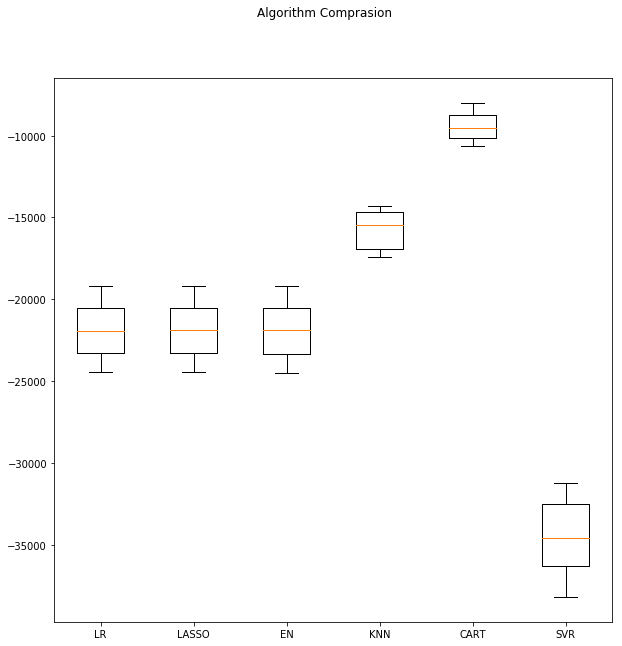

In [250]:
fig=plt.figure()
fig.suptitle('Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [256]:
model=DecisionTreeRegressor()
model.fit(X=X_train,y=Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [257]:
predictions=model.predict(X_validation)
print(mean_squared_error(Y_validation,predictions))

8917.586776859504


In [265]:
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

In [259]:
predictions

array([196., 130., 184., ...,  46.,  74.,  12.])

In [260]:
Y_validation

array([285., 138., 215., ...,  58.,  76.,   4.])

In [175]:


testset=pd.read_csv('test.csv')
testset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.37,56,26.0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.63,56,0.0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.63,56,0.0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.88,56,11.0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.88,56,11.0


This models dont look nice. We should standardize the data.

# Standardize the data

In [333]:
piplines=[]
piplines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
piplines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
piplines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
piplines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
piplines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
piplines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

results=[]
names=[]
for name, model in piplines:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)




'ScaledLR': -21898.694250 (1049.588501)
'ScaledLASSO': -21895.584944 (1053.275361)
'ScaledEN': -22536.531118 (1061.807631)
'ScaledKNN': -11839.255028 (762.649234)
'ScaledCART': -8954.503368 (628.177960)
'ScaledSVR': -22177.324622 (1719.631824)


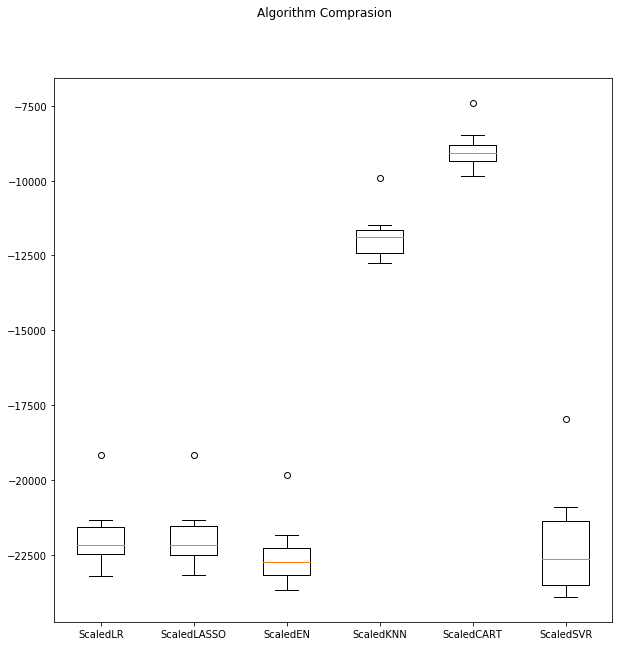

In [334]:
fig=plt.figure()
fig.suptitle('Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning ScaledCART

In [335]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 4000, num = 10)]
# Number of features to consider at every split
splitter = ['best','random']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 150, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,3,7,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
               'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'splitter': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'splitter': ['best', 'random'], 'max_depth': [2, 16, 31, 46, 61, 76, 90, 105, 120, 135, 150, None], 'min_samples_split': [2, 5, 10, 3, 7, 15], 'min_samples_leaf': [1, 2, 4, 6, 8, 12]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'splitter': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [336]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
CART = DecisionTreeRegressor()
# Random search of parameters, using 3 fofld cross validation, 
# search across 100 different combinations, and use all available cores
CART_random = RandomizedSearchCV(estimator = CART, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
CART_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] splitter=best, min_samples_split=3, min_samples_leaf=8, max_depth=31 
[CV] splitter=best, min_samples_split=3, min_samples_leaf=8, max_depth=31 
[CV] splitter=best, min_samples_split=3, min_samples_leaf=8, max_depth=31 
[CV] splitter=best, min_samples_split=2, min_samples_leaf=1, max_depth=150 
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=8, max_depth=31, total=   0.0s
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=8, max_depth=31, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=1, max_depth=150 
[CV] splitter=best, min_samples_split=2, min_samples_leaf=1, max_depth=150 
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=8, max_depth=31, total=   0.0s
[CV] splitter=random, min_samples_split=15, min_samples_leaf=8, max_depth=120 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=1, max_depth=150, total=   0.1s
[CV]  splitter=best, min_samples_split=2, mi

[CV]  splitter=random, min_samples_split=3, min_samples_leaf=12, max_depth=2, total=   0.0s
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=4, max_depth=16, total=   0.1s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=4, max_depth=16 
[CV] splitter=best, min_samples_split=15, min_samples_leaf=4, max_depth=135 
[CV] splitter=random, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV]  splitter=best, min_samples_split=15, min_samples_leaf=4, max_depth=135, total=   0.0s
[CV]  splitter=best, min_samples_split=7, min_samples_leaf=12, max_depth=90, total=   0.0s
[CV]  splitter=random, min_samples_split=7, min_samples_leaf=8, max_depth=None, total=   0.0s
[CV] splitter=random, min_samples_split=7, min_samples_leaf=8, max_depth=None 
[CV] splitter=best, min_samples_split=7, min_samples_leaf=12, max_depth=90 
[CV] splitter=best, min_samples_split=15, min_samples_leaf=4, max_depth=135 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=4, max_depth=16, to

[CV]  splitter=random, min_samples_split=5, min_samples_leaf=1, max_depth=76, total=   0.0s
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=2, max_depth=105, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=12, max_depth=16 
[CV]  splitter=best, min_samples_split=15, min_samples_leaf=8, max_depth=61, total=   0.0s
[CV] splitter=best, min_samples_split=3, min_samples_leaf=2, max_depth=105 
[CV] splitter=best, min_samples_split=15, min_samples_leaf=8, max_depth=61 
[CV] splitter=best, min_samples_split=15, min_samples_leaf=4, max_depth=46 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=12, max_depth=16, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=12, max_depth=16 
[CV]  splitter=best, min_samples_split=15, min_samples_leaf=4, max_depth=46, total=   0.0s
[CV] splitter=random, min_samples_split=2, min_samples_leaf=1, max_depth=76 
[CV]  splitter=best, min_samples_split=15, min_samples_leaf=8, max_depth=61, total= 

[CV] splitter=best, min_samples_split=3, min_samples_leaf=4, max_depth=2 
[CV] splitter=random, min_samples_split=5, min_samples_leaf=2, max_depth=76 
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=4, max_depth=2, total=   0.0s
[CV]  splitter=random, min_samples_split=5, min_samples_leaf=1, max_depth=61, total=   0.1s
[CV] splitter=best, min_samples_split=3, min_samples_leaf=12, max_depth=31 
[CV] splitter=best, min_samples_split=3, min_samples_leaf=4, max_depth=2 
[CV]  splitter=random, min_samples_split=5, min_samples_leaf=2, max_depth=76, total=   0.0s
[CV] splitter=random, min_samples_split=5, min_samples_leaf=2, max_depth=76 
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=4, max_depth=2, total=   0.0s
[CV]  splitter=best, min_samples_split=7, min_samples_leaf=6, max_depth=61, total=   0.1s
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=12, max_depth=31, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=4, max_depth=46 
[CV

[CV] splitter=random, min_samples_split=10, min_samples_leaf=12, max_depth=46 
[CV]  splitter=random, min_samples_split=5, min_samples_leaf=2, max_depth=120, total=   0.0s
[CV] splitter=random, min_samples_split=5, min_samples_leaf=2, max_depth=120 
[CV]  splitter=best, min_samples_split=10, min_samples_leaf=1, max_depth=None, total=   0.0s
[CV]  splitter=random, min_samples_split=10, min_samples_leaf=12, max_depth=46, total=   0.0s
[CV] splitter=best, min_samples_split=3, min_samples_leaf=12, max_depth=2 
[CV]  splitter=random, min_samples_split=5, min_samples_leaf=2, max_depth=120, total=   0.0s
[CV] splitter=best, min_samples_split=10, min_samples_leaf=1, max_depth=None 
[CV] splitter=best, min_samples_split=7, min_samples_leaf=12, max_depth=120 
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=12, max_depth=2, total=   0.0s
[CV]  splitter=best, min_samples_split=7, min_samples_leaf=1, max_depth=76, total=   0.0s
[CV] splitter=best, min_samples_split=3, min_samples_leaf=12

[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    2.4s


[CV]  splitter=best, min_samples_split=7, min_samples_leaf=12, max_depth=120, total=   0.0s
[CV]  splitter=random, min_samples_split=3, min_samples_leaf=12, max_depth=None, total=   0.0s
[CV] splitter=best, min_samples_split=7, min_samples_leaf=12, max_depth=120 
[CV]  splitter=random, min_samples_split=3, min_samples_leaf=6, max_depth=46, total=   0.0s
[CV] splitter=random, min_samples_split=3, min_samples_leaf=12, max_depth=None 
[CV] splitter=random, min_samples_split=3, min_samples_leaf=6, max_depth=46 
[CV]  splitter=random, min_samples_split=3, min_samples_leaf=12, max_depth=None, total=   0.0s
[CV] splitter=best, min_samples_split=2, min_samples_leaf=12, max_depth=120 
[CV]  splitter=random, min_samples_split=3, min_samples_leaf=6, max_depth=46, total=   0.0s
[CV]  splitter=best, min_samples_split=7, min_samples_leaf=1, max_depth=76, total=   0.0s
[CV] splitter=best, min_samples_split=5, min_samples_leaf=1, max_depth=135 
[CV] splitter=best, min_samples_split=15, min_samples_lea

[CV] splitter=best, min_samples_split=2, min_samples_leaf=4, max_depth=135 
[CV]  splitter=best, min_samples_split=5, min_samples_leaf=8, max_depth=46, total=   0.0s
[CV]  splitter=random, min_samples_split=3, min_samples_leaf=6, max_depth=61, total=   0.0s
[CV] splitter=random, min_samples_split=7, min_samples_leaf=1, max_depth=105 
[CV]  splitter=best, min_samples_split=3, min_samples_leaf=1, max_depth=16, total=   0.0s
[CV] splitter=random, min_samples_split=3, min_samples_leaf=6, max_depth=61 
[CV]  splitter=best, min_samples_split=2, min_samples_leaf=4, max_depth=135, total=   0.0s
[CV] splitter=best, min_samples_split=3, min_samples_leaf=1, max_depth=16 
[CV] splitter=best, min_samples_split=2, min_samples_leaf=4, max_depth=135 
[CV]  splitter=random, min_samples_split=7, min_samples_leaf=1, max_depth=105, total=   0.0s
[CV]  splitter=random, min_samples_split=3, min_samples_leaf=6, max_depth=61, total=   0.0s
[CV] splitter=random, min_samples_split=7, min_samples_leaf=1, max_dep

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.7s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'splitter': ['best', 'random'], 'max_depth': [2, 16, 31, 46, 61, 76, 90, 105, 120, 135, 150, None], 'min_samples_split': [2, 5, 10, 3, 7, 15], 'min_samples_leaf': [1, 2, 4, 6, 8, 12]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [337]:
CART_random.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 12,
 'max_depth': 120}

Best parameters for this model

# Evaluate tuned model

In [327]:
models=[]
models.append(('CART',DecisionTreeRegressor(splitter='best',min_samples_split=7,min_samples_leaf=12,max_depth=90)))
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'CART': -6647.906556 (662.874671)


In [328]:
model=DecisionTreeRegressor(splitter='best',min_samples_split=7,min_samples_leaf=12,max_depth=90)
results=[]
model.fit(X=X_train,y=Y_train)
predictions=model.predict(X_validation)
print(mean_squared_error(Y_validation,predictions))

6117.281293646435


Model get much bether result then with defult parameters

# Ensemble Methods

In [319]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [329]:
ensembles=[]
ensembles.append(('ScaledAB',Pipeline([('Scaler',StandardScaler()),('AB',AdaBoostRegressor())])))
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF',Pipeline([('Scaler',StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET',Pipeline([('Scaler',StandardScaler()),('ET',ExtraTreesRegressor())])))

results=[]
names=[]
for name, model in ensembles:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'ScaledAB': -12577.179520 (874.464860)
'ScaledGBM': -6971.631294 (480.414507)
'ScaledRF': -5535.749496 (556.405314)
'ScaledET': -5634.228881 (623.527981)


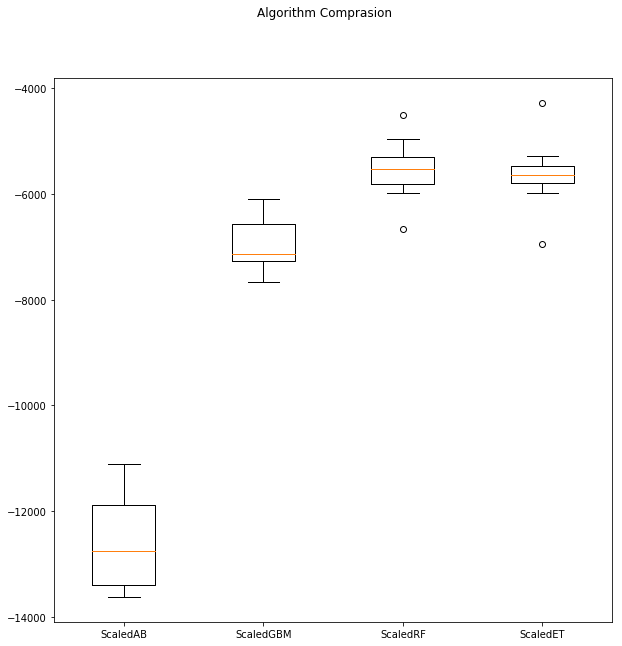

In [330]:
fig=plt.figure()
fig.suptitle('Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tunning RF

In [352]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [362]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
RF = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
RF_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
RF_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.4s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   4.5s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 


[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  11.6s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.0min


[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=  11.4s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  37.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=False, total=  37.3s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=False, total=  18.4s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators

[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=  23.5s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True, total=  12.1s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False, total=  19.8s
[CV] n_estimators=1400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=  36.8s
[CV] n_estimators=

[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   6.7s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=True, total=   6.7s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=90, bootstrap=True, total=  15.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False, total=   9.5s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=False 
[CV]  n_estimators=1800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   5.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  12.8s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  12.9s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=  13.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False 
[CV]  n_estimators=400, 

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.1min


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  24.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  24.6s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=  52.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=  24.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimat

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=False, total=  25.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=  31.1s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=  13.8s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=  14.1s
[CV] n_estima

[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=90, bootstrap=False, total=  12.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   4.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   4.7s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False, total=   4.8s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=

[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=False, total=  21.3s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   7.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   4.2s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   7.4s
[CV] n_estimators=1600,

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   5.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  21.3s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total=   5.2s
[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  21.5s
[CV] n_estimators=2000

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 25.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [363]:
RF_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [364]:
models=[]
models.append(('RF',RandomForestRegressor(
n_estimators=800,
max_features='auto',
max_depth=None,
min_samples_split=5,
min_samples_leaf=2,
bootstrap=True
)))
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

'RF': -4996.061808 (488.860699)


In [366]:
model=RandomForestRegressor(
n_estimators=800,
max_features='auto',
max_depth=None,
min_samples_split=5,
min_samples_leaf=2,
bootstrap=True
)
results=[]
model.fit(X=X_train,y=Y_train)
predictions=model.predict(X_validation)
print(mean_squared_error(Y_validation,predictions))

4918.456800412322
